<a href="https://colab.research.google.com/github/ToothlessRider/PySpark-Basics/blob/main/PySpark_Aaron_Augustine_232010002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySpark Lab 1
Name : Aaron Augustine
Roll No : 232010002
Course : SyMCA

## Aim
To answer all the questions given below on PySpark

Q.1 Create pyspark session.

For this first we will have to install pyspark onto the colab file

In [82]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install pyspark

In [135]:
# Important pyspark sql function to import
from pyspark.sql.functions import explode, split, lit, col, when, sum, mean, skewness, kurtosis, avg

In [83]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Colab PySpark Session") \
    .getOrCreate()

spark

Q.2 How to read and write a data with SparkSession

To read or write data with sparksession we are going to have to pass a csv file.



In [84]:
df = spark.read.csv('/content/drive/MyDrive/Classroom/SYMCA24-25(BABI)/student_performance.csv', header=True, inferSchema=True)
df.show()

+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|StudentID|    Name|Gender|AttendanceRate|StudyHoursPerWeek|PreviousGrade|ExtracurricularActivities|ParentalSupport|FinalGrade|
+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|        1|    John|  Male|            85|               15|           78|                        1|           High|        80|
|        2|   Sarah|Female|            90|               20|           85|                        2|         Medium|        87|
|        3|    Alex|  Male|            78|               10|           65|                        0|            Low|        68|
|        4| Michael|  Male|            92|               25|           90|                        3|           High|        92|
|        5|    Emma|Female|            88|               18|           82|                        2|    


Q.3 Create a csv file in excel and read it as a dataframe

Created a student_performace.csv file and uploaded it to sample data. Reading it in as a dataframe

Q.4 Display the dataframe.



In [85]:
df.describe().show()

+-------+------------------+------+------+-----------------+-----------------+------------------+-------------------------+---------------+------------------+
|summary|         StudentID|  Name|Gender|   AttendanceRate|StudyHoursPerWeek|     PreviousGrade|ExtracurricularActivities|ParentalSupport|        FinalGrade|
+-------+------------------+------+------+-----------------+-----------------+------------------+-------------------------+---------------+------------------+
|  count|                10|    10|    10|               10|               10|                10|                       10|             10|                10|
|   mean|               5.5|  NULL|  NULL|             85.6|             17.7|              78.1|                      1.5|           NULL|              80.2|
| stddev|3.0276503540974917|  NULL|  NULL|7.441624673267109|6.848357467305573|10.170217958988554|       1.0801234497346435|           NULL|10.097304370749432|
|    min|                 1|  Alex|Female|    

Q.5 Display the basic statistics of the dataframe

Basic statistic mean the Mean, Median, Standard Deviation, Count, Min and Max


In [86]:
column_dtypes = df.dtypes

for column, dtype in column_dtypes:
  print(f"Column : {column} \n Datatype : {dtype}")

Column : StudentID 
 Datatype : int
Column : Name 
 Datatype : string
Column : Gender 
 Datatype : string
Column : AttendanceRate 
 Datatype : int
Column : StudyHoursPerWeek 
 Datatype : int
Column : PreviousGrade 
 Datatype : int
Column : ExtracurricularActivities 
 Datatype : int
Column : ParentalSupport 
 Datatype : string
Column : FinalGrade 
 Datatype : int


Q.6 Extract the header and its datatypes

This can be done by storing the column name and the respective datatype into a variable and then iterating through it


In [87]:
df.printSchema()

root
 |-- StudentID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- AttendanceRate: integer (nullable = true)
 |-- StudyHoursPerWeek: integer (nullable = true)
 |-- PreviousGrade: integer (nullable = true)
 |-- ExtracurricularActivities: integer (nullable = true)
 |-- ParentalSupport: string (nullable = true)
 |-- FinalGrade: integer (nullable = true)




Q.7 Print the schema of the dataframe

This can be done using the `printSchema()` function



In [88]:
df.show(5)

+---------+-------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|StudentID|   Name|Gender|AttendanceRate|StudyHoursPerWeek|PreviousGrade|ExtracurricularActivities|ParentalSupport|FinalGrade|
+---------+-------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|        1|   John|  Male|            85|               15|           78|                        1|           High|        80|
|        2|  Sarah|Female|            90|               20|           85|                        2|         Medium|        87|
|        3|   Alex|  Male|            78|               10|           65|                        0|            Low|        68|
|        4|Michael|  Male|            92|               25|           90|                        3|           High|        92|
|        5|   Emma|Female|            88|               18|           82|                        2|         Med

Q.8 Print top 5 rows of the dataframe

To Print the top 5 rows we just need to pass the parameter `5` to the `show()` function



In [89]:
df.columns

['StudentID',
 'Name',
 'Gender',
 'AttendanceRate',
 'StudyHoursPerWeek',
 'PreviousGrade',
 'ExtracurricularActivities',
 'ParentalSupport',
 'FinalGrade']

Q.9 Display the column header of the dataframe

This can be done using the `columns` property of the csv file

In [90]:
df.select('gender').show(5)


# df.select('gender').distinct().show()
# df.select('gender').distinct().count()

+------+
|gender|
+------+
|  Male|
|Female|
|  Male|
|  Male|
|Female|
+------+
only showing top 5 rows



Q.10 Select one or more columns from the dataframe

This can be done using the `select()` function and passing the column name as the parameter. Then using the `show()` function to display the output

In [91]:
df.count()

10

Q.11 How do you get the number of rows in a DataFrame?

This can be done using the `count()` function

In [92]:
df.where(df["Gender"] == 'Male').show()
df.where(df["Name"] == 'John').show()

+---------+-------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|StudentID|   Name|Gender|AttendanceRate|StudyHoursPerWeek|PreviousGrade|ExtracurricularActivities|ParentalSupport|FinalGrade|
+---------+-------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+
|        1|   John|  Male|            85|               15|           78|                        1|           High|        80|
|        3|   Alex|  Male|            78|               10|           65|                        0|            Low|        68|
|        4|Michael|  Male|            92|               25|           90|                        3|           High|        92|
|        7| Daniel|  Male|            70|                8|           60|                        0|            Low|        62|
|        9|  James|  Male|            82|               12|           70|                        2|            

Q.12 How do you select a perticular rows from a dataframe?

This can be done using two functions :
`filter()` or `where()` and then passing the row and the respective value of the row you want to filer it based on

```python
df.filter(df["column_name"] == value).show()
df.where(df["column_name"] == value).show()
```

In [93]:
df = df.withColumn("new_column", lit("constant_value"))

df.show()


+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+--------------+
|StudentID|    Name|Gender|AttendanceRate|StudyHoursPerWeek|PreviousGrade|ExtracurricularActivities|ParentalSupport|FinalGrade|    new_column|
+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+--------------+
|        1|    John|  Male|            85|               15|           78|                        1|           High|        80|constant_value|
|        2|   Sarah|Female|            90|               20|           85|                        2|         Medium|        87|constant_value|
|        3|    Alex|  Male|            78|               10|           65|                        0|            Low|        68|constant_value|
|        4| Michael|  Male|            92|               25|           90|                        3|           High|        92|constant_value|

Q.13 How do you add a new column to a DataFrame with a constant value?

This can easily be done by the `withColumn()` function and using the `lit()` function we can pass the same value to every row in the new columb

In [94]:
df.withColumnRenamed("new_column", "Final Credit").show()

+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+--------------+
|StudentID|    Name|Gender|AttendanceRate|StudyHoursPerWeek|PreviousGrade|ExtracurricularActivities|ParentalSupport|FinalGrade|  Final Credit|
+---------+--------+------+--------------+-----------------+-------------+-------------------------+---------------+----------+--------------+
|        1|    John|  Male|            85|               15|           78|                        1|           High|        80|constant_value|
|        2|   Sarah|Female|            90|               20|           85|                        2|         Medium|        87|constant_value|
|        3|    Alex|  Male|            78|               10|           65|                        0|            Low|        68|constant_value|
|        4| Michael|  Male|            92|               25|           90|                        3|           High|        92|constant_value|

Q.14 How can you rename a column in a DataFrame?

We can use the `withColumnRenamed()` function and pass the paramters to it, i.e. the old column name and the new column name

In [95]:
df = df.drop("new_column")

#df.drop("new_column").show()

Q.15 How do you drop a column from a DataFrame?

This can be done using the `drop()` function

🔴  Important note to remember is that unless you write it as
```python
df = df.drop("new_column")
```
It won't be re written no the original csv file

In [96]:

# Skewness and kurtosis have to be imported from the pyspark sql library

df.select(skewness("AttendanceRate")).show()

df.select(kurtosis("AttendanceRate")).show()

+------------------------+
|skewness(AttendanceRate)|
+------------------------+
|     -0.8336552137280455|
+------------------------+

+------------------------+
|kurtosis(AttendanceRate)|
+------------------------+
|    -0.04221921062327416|
+------------------------+



Q.16 How do you calculate the Skewness and Kurtosis of a particular column in a dataframe?

To find these two properties of a particular column we can use the `skewness()` and `kurtosis()` functions along with the `select()` function to select those of a particular column

In [97]:
df = df.withColumnRenamed("StudyHoursPerWeek", "Learning Time") \
       .withColumnRenamed("FinalGrade", "Final Score")

df.show()


+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        1|    John|  Male|            85|           15|           78|                        1|           High|         80|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        3|    Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|        5|    Emma|Female|            88|           18|           82|                        2|         Medium|         85|


Q.17 How do you rename multiple columns?

This can be done using the `withColumnRenamed()` function, multiple times

In [98]:
schema = df.schema

new_data = [(11,"Aaron","Male",99,40,100,7,"High",100)\
            ,(12,"Tejas","Male",78,22,85,7,"Medium",85)]

new_df = spark.createDataFrame(new_data, schema=schema)

df = df.union(new_df)
df.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        1|    John|  Male|            85|           15|           78|                        1|           High|         80|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        3|    Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|        5|    Emma|Female|            88|           18|           82|                        2|         Medium|         85|


Q.18 Add a few rows with values

This is a slightly lengthy process since I will have to create a new dataframe with the new rows and then use the union function to combine the old one and the new one.
Using the existing schema we can create the new datafram easily and then go ahead and use union to integrate the new dataframe into the old one

In [99]:
new_data_null = [(None, None, None, None, None, None, None, None, None),
                 (None, None, None, None, None, None, None, None, None)]

new_df_null = spark.createDataFrame(new_data_null, schema=schema)

df = df.union(new_df_null)
df.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        1|    John|  Male|            85|           15|           78|                        1|           High|         80|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        3|    Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|        5|    Emma|Female|            88|           18|           82|                        2|         Medium|         85|


Q.19 Add a few rows with some null values
Q.20 Add a new row with completely null values

Similar process to the last one but you just need to define each one of the input values as `None`

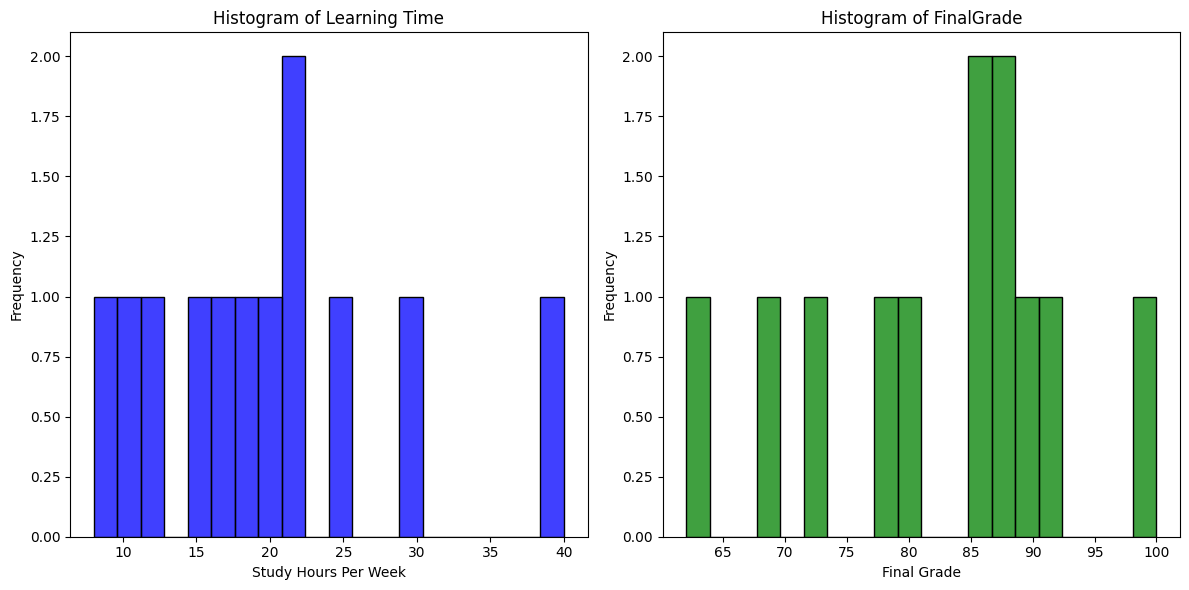

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your PySpark DataFrame
# Convert PySpark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for StudyHoursPerWeek
plt.subplot(1, 2, 1)
sns.histplot(pdf['Learning Time'], bins=20, kde=False, color='blue')
plt.title('Histogram of Learning Time')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')

# Histogram for FinalGrade
plt.subplot(1, 2, 2)
sns.histplot(pdf['Final Score'], bins=20, kde=False, color='green')
plt.title('Histogram of FinalGrade')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


Q.21 Plot a histogram using any two columns

Steps:
- Convert PySpark DataFrame to Pandas DataFrame:
Use the .toPandas() method to convert the PySpark DataFrame to a Pandas DataFrame.

- Use Matplotlib or Seaborn to Plot the Histogram:
Plot the histogram using Matplotlib or Seaborn.



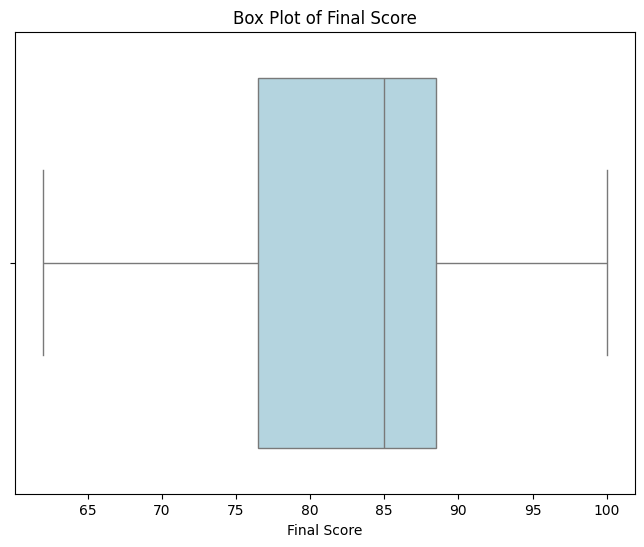

In [101]:
%matplotlib inline
# Plot box plot for the column 'FinalGrade'
plt.figure(figsize=(8, 6))
sns.boxplot(x=pdf['Final Score'], color='lightblue')
plt.title('Box Plot of Final Score')
plt.xlabel('Final Score')


# Show the plot
plt.show()

Q.22 Plot a box plot for a particular column

The same way we used matplotlib and pandas for the histogram we have to use the same to get the boxplot
1. Setup the figure size using the `figure()` function
2. Then set the title using `title()` and then X label using `xlabel()`


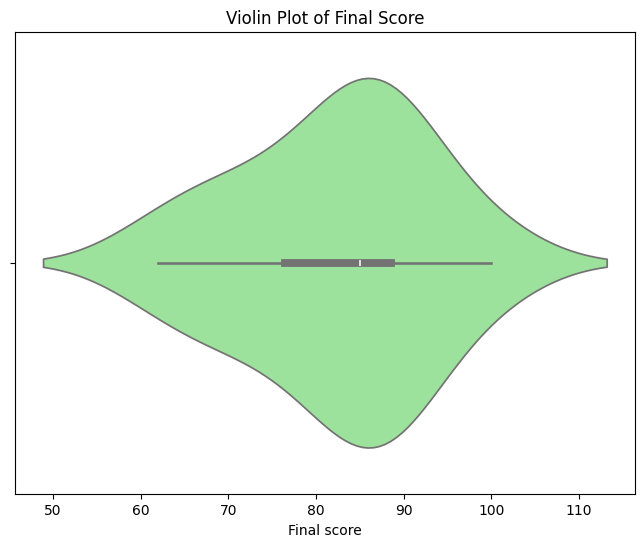

In [102]:
%matplotlib inline
# Plot violin plot for the column 'FinalGrade'
plt.figure(figsize=(8, 6))
sns.violinplot(x=pdf['Final Score'], color='lightgreen')
plt.title('Violin Plot of Final Score')
plt.xlabel('Final score')

# Show the plot
plt.show()

Q.23 Plot a violin plot for a particular columns

Again using seaborn and matplotlib along with the `violinpliot()` function we can create a violin plot and define the xlabel along with the name of the Y-axis


In [103]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# Define data
data1 = [
    (1, "Aaron", 21),
    (2, "Nikhil", 23),
    (3, "Tejas", 22)
]

# Define schema
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True)
])

# Create DataFrame
sdf = spark.createDataFrame(data1, schema=schema)

# Show the DataFrame
sdf.show()

+---+------+---+
| ID|  Name|Age|
+---+------+---+
|  1| Aaron| 21|
|  2|Nikhil| 23|
|  3| Tejas| 22|
+---+------+---+



Q.24 Create a dataframe with 3 columns

For this we need to first define the schema we are going to use for the following dataframe and the kinds of inputs it will accept, namely the dataypes

In [104]:
data2 = [
    (4, "Rushabh", 22),
    (5, "Somesh", 21),
    (6, "Tatvam", 31),
    (None,None,None)
]

tdf = spark.createDataFrame(data2, schema=schema)
sdf = sdf.union(tdf)
sdf.show()


+----+-------+----+
|  ID|   Name| Age|
+----+-------+----+
|   1|  Aaron|  21|
|   2| Nikhil|  23|
|   3|  Tejas|  22|
|   4|Rushabh|  22|
|   5| Somesh|  21|
|   6| Tatvam|  31|
|NULL|   NULL|NULL|
+----+-------+----+



Q.25 Combine two dataframes

This can be done using the `union()` function. While doing this we need to make sure that we are combining two dataframes that are following the same schema


In [105]:


sdf_filtered = sdf.filter(col("Name").isNull())
sdf_filtered.show()

+----+----+----+
|  ID|Name| Age|
+----+----+----+
|NULL|NULL|NULL|
+----+----+----+




Q.26 How do you filter rows where a column has null values?

This can be done by using the `isNull()` function along with the `col()` function in the sql library of pyspark to access the column with a specific `name` and check if there are null values in them

In [106]:
sdf = sdf.dropna()

sdf.show()

+---+-------+---+
| ID|   Name|Age|
+---+-------+---+
|  1|  Aaron| 21|
|  2| Nikhil| 23|
|  3|  Tejas| 22|
|  4|Rushabh| 22|
|  5| Somesh| 21|
|  6| Tatvam| 31|
+---+-------+---+



Q.27 Drop Null valued row

This can be done using the `dropna()` function which will drop any row that has a null value

In [107]:
sdf_filtered = sdf.dropna(thresh=2)

sdf_filtered.show()


+---+-------+---+
| ID|   Name|Age|
+---+-------+---+
|  1|  Aaron| 21|
|  2| Nikhil| 23|
|  3|  Tejas| 22|
|  4|Rushabh| 22|
|  5| Somesh| 21|
|  6| Tatvam| 31|
+---+-------+---+



Q.28 Drop rows with atleast 2 NULL values (use threshold and any feature)

To do this we need to pass the additional condition of threshold being equal to 2
```python

sdf_filtered = sdf.dropna(thresh=2)
```

In [108]:
null_data = [(7, None, 25),
    (8, "Charlie", None),
    (9, None, None)]

null_df = spark.createDataFrame(null_data, schema=schema)

sdf = sdf.union(null_df)

sdf.fillna(0).show()

+---+-------+---+
| ID|   Name|Age|
+---+-------+---+
|  1|  Aaron| 21|
|  2| Nikhil| 23|
|  3|  Tejas| 22|
|  4|Rushabh| 22|
|  5| Somesh| 21|
|  6| Tatvam| 31|
|  7|   NULL| 25|
|  8|Charlie|  0|
|  9|   NULL|  0|
+---+-------+---+



Q.29 How do you fill null values with a specific value?


To replace the null values with another value we can simple replace the null values with 0

In [109]:
df_sorted = df.orderBy(col("gender").asc())

df_sorted.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|     NULL|    NULL|  NULL|          NULL|         NULL|         NULL|                     NULL|           NULL|       NULL|
|     NULL|    NULL|  NULL|          NULL|         NULL|         NULL|                     NULL|           NULL|       NULL|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        5|    Emma|Female|            88|           18|           82|                        2|         Medium|         85|
|        6|  Olivia|Female|            95|           30|           88|                        1|           High|         90|


Q.30 How do you sort a DataFrame by a column?

To sort a dataframe by a column we can use the `orderBy()` function

Additionally if we use the `col()` function to access the specific column and use either `asc()` or `desc()` function we can define if we want the column to be sorted in ascending or in descending order

In [110]:
# Sort by 'Age' in ascending order and 'Name' in descending order
df_sorted_multi = df.orderBy(col("AttendanceRate").desc(), col("Name").asc())

# Show the resulting DataFrame
df_sorted_multi.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|       11|   Aaron|  Male|            99|           40|          100|                        7|           High|        100|
|        6|  Olivia|Female|            95|           30|           88|                        1|           High|         90|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|       10|Isabella|Female|            91|           22|           86|                        3|           High|         88|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|


Q.31 How do you sort a DataFrame by multiple columns?

Passing two arguements where both are columns, to the `orderBy()` function is possible and it will go ahead and sort the function based on whether or not you want it in ascending or in descending

In [111]:
base_schema = df.schema

dupl_data = [(1,"John","Male",85,15,78,1,"High",80)]

dupl_dp = spark.createDataFrame(dupl_data, schema=base_schema)

df = df.union(dupl_dp)

df.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        1|    John|  Male|            85|           15|           78|                        1|           High|         80|
|        2|   Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        3|    Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|        5|    Emma|Female|            88|           18|           82|                        2|         Medium|         85|


In [112]:
df_no_duplicates = df.dropDuplicates()

df_no_duplicates.show()

+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|    Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+--------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        3|    Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4| Michael|  Male|            92|           25|           90|                        3|           High|         92|
|        1|    John|  Male|            85|           15|           78|                        1|           High|         80|
|        8|  Sophia|Female|            85|           17|           77|                        1|         Medium|         78|
|       10|Isabella|Female|            91|           22|           86|                        3|           High|         88|


Q.32 How do you drop duplicate rows from a DataFrame?

We can use the `dropDuplicates()` function which will remove any rows with duplicate values

In [113]:
data = [
    (1, "Alice", 30),
    (2, "Bob", 25),
    (3, "Charlie", 35)
]

# Define the schema for the DataFrame
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True)
])

# Create DataFrame
cre_df = spark.createDataFrame(data, schema=schema)

# Show the resulting DataFrame
cre_df.show()

+---+-------+---+
| ID|   Name|Age|
+---+-------+---+
|  1|  Alice| 30|
|  2|    Bob| 25|
|  3|Charlie| 35|
+---+-------+---+



Q.33 Create a DataFrame from a list of tuples?


In [114]:
df.show(4)

+---------+-------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|StudentID|   Name|Gender|AttendanceRate|Learning Time|PreviousGrade|ExtracurricularActivities|ParentalSupport|Final Score|
+---------+-------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
|        1|   John|  Male|            85|           15|           78|                        1|           High|         80|
|        2|  Sarah|Female|            90|           20|           85|                        2|         Medium|         87|
|        3|   Alex|  Male|            78|           10|           65|                        0|            Low|         68|
|        4|Michael|  Male|            92|           25|           90|                        3|           High|         92|
+---------+-------+------+--------------+-------------+-------------+-------------------------+---------------+-----------+
only sho

Q.34 Display the first few rows of a DataFrame?

This can simply be done by passing a numerical value to the `show()` function

In [115]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

word_spark = SparkSession.builder.appName("WordCount").getOrCreate()

text_file = word_spark.read.text("/content/drive/MyDrive/Classroom/SYMCA24-25(BABI)/deus.txt")

words_df = text_file.select(explode(split(text_file.value, " ")).alias("word"))

words_df = words_df.filter(words_df.word != "")

word_counts = words_df.groupBy("word").count().orderBy(F.desc("count"))

word_counts.show()


+----------+-----+
|      word|count|
+----------+-----+
|       the|    9|
|       and|    9|
|        to|    7|
|        of|    6|
|      will|    5|
|      Homo|    5|
|       new|    4|
|        we|    4|
|    happen|    3|
|         –|    3|
|      when|    3|
|       our|    3|
|        as|    3|
|     might|    3|
|   History|    2|
|         a|    2|
|         A|    2|
|ourselves?|    2|
|    planet|    2|
|        As|    2|
+----------+-----+
only showing top 20 rows



Q.35 Using SparkSession :perform a word count on a text file

The steps to be followed for this are :  
1. Start a session called wordCount
2. Read the text file
3. Split each line into work
4. Filter out all the words that have resulted from multiple spaces
5. Group by the word and count occurrences

In [116]:
from pyspark.sql import SparkSession

sql_spark = SparkSession.builder.appName("SQLQuery").getOrCreate()

data_sql = [(1,"Aaron Augustine","Male",21)
            ,(2, "Nandu Bhide","Female",22)
            ,(3,"Omar Abdullah","Male",23)]

schema_sql = ["ID","Name","Gender","Age"]

df_sql = sql_spark.createDataFrame(data_sql, schema=schema_sql)

df_sql.createOrReplaceTempView("people")

result_df = sql_spark.sql("SELECT * FROM people WHERE Age > 21")
result_df.show()

+---+-------------+------+---+
| ID|         Name|Gender|Age|
+---+-------------+------+---+
|  2|  Nandu Bhide|Female| 22|
|  3|Omar Abdullah|  Male| 23|
+---+-------------+------+---+



Q.36 Create a SQL Table in PySpark <br>
`AND`
Q.47 Filter the rows based on a particular condition and count the number of rows <br>
`AND`
Q.48 Filter the rows based on a particular condition and display only a subset of features


Create a data  tuple of information and then you can create the SQL table within it

In [117]:
df_sql.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
+---+---------------+------+---+




Q.37 How to display a Specific Number of Rows

Using the `show()` function

In [118]:


sum_age = df_sql.agg(sum("Age")).collect()[0][0]

print(f"Sum of the Ages column : {sum_age} ")

Sum of the Ages column : 66 



Q.38 How do you compute the sum of a column?

First we use the `agg()` function and then pass the name of the column to the `sum()` function that is imported from pyspark.sql.functions

In [119]:
columns = df_sql.columns

selected_columns = [columns[i] for i in range(0,3)]

df_selected = df_sql.select(*selected_columns)

df_selected.show()

+---+---------------+------+
| ID|           Name|Gender|
+---+---------------+------+
|  1|Aaron Augustine|  Male|
|  2|    Nandu Bhide|Female|
|  3|  Omar Abdullah|  Male|
+---+---------------+------+




Q.39 Select Columns using index


This can be done by deciding on the column numbers to be selected and then creating a variable that will store the column names.



In [120]:
df_with_new_col = df_sql.withColumn("Country", lit("USA"))

# Show the DataFrame with the new column
df_with_new_col.show()

df_without_col = df_with_new_col.drop("Country")

df_without_col.show()

+---+---------------+------+---+-------+
| ID|           Name|Gender|Age|Country|
+---+---------------+------+---+-------+
|  1|Aaron Augustine|  Male| 21|    USA|
|  2|    Nandu Bhide|Female| 22|    USA|
|  3|  Omar Abdullah|  Male| 23|    USA|
+---+---------------+------+---+-------+

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
+---+---------------+------+---+




Q.40 Add and remove new column

This can be done by using the `withColumn()` function and then dropped using the `drop()`

In [121]:

blank_data = [(4, "Charlie", "", 0)
]
extra_schema = df_sql.schema
extra_df = sql_spark.createDataFrame(blank_data, schema=extra_schema)

df_sql = df_sql.union(extra_df)

df_sql.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
|  4|        Charlie|      |  0|
+---+---------------+------+---+



In [122]:
df_replaced = df_sql.select([
    when(col(c) == "", None).otherwise(col(c)).alias(c) for c in df_sql.columns
])

df_replaced.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
|  4|        Charlie|  NULL|  0|
+---+---------------+------+---+



Q.41 Replace all the blank values with NULL


In [123]:
df_cleaned = df_replaced.dropna()

df_cleaned.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
+---+---------------+------+---+



Q.42 Delete rows with Null values from any columns


In [124]:
df_specific_cleaned = df_replaced.dropna(subset=["Gender"])


Q.43 Delete the null values from a particular column


In [125]:
df_filled = df_replaced.fillna("Unknown")

df_filled.show()

+---+---------------+-------+---+
| ID|           Name| Gender|Age|
+---+---------------+-------+---+
|  1|Aaron Augustine|   Male| 21|
|  2|    Nandu Bhide| Female| 22|
|  3|  Omar Abdullah|   Male| 23|
|  4|        Charlie|Unknown|  0|
+---+---------------+-------+---+



Q.44 Fill all null values in a dataframe with a values


In [126]:
df_filled = df_replaced.fillna({'Gender': 'Missing'})

df_filled.show()

+---+---------------+-------+---+
| ID|           Name| Gender|Age|
+---+---------------+-------+---+
|  1|Aaron Augustine|   Male| 21|
|  2|    Nandu Bhide| Female| 22|
|  3|  Omar Abdullah|   Male| 23|
|  4|        Charlie|Missing|  0|
+---+---------------+-------+---+



Q.45 Fill null value of a particuar column with missing value


In [127]:
david = [(5, "David goggins", None,None)]

david_add = sql_spark.createDataFrame(david, schema=extra_schema)

df_replaced = df_replaced.union(david_add)
mean_age = df_replaced.select(mean(col("Age"))).first()[0]

# Fill NULL values in the 'Age' column with the mean value
df_filled = df_replaced.fillna({'Age': mean_age})

# Show the DataFrame after filling NULL values with the mean
df_filled.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
|  4|        Charlie|  NULL|  0|
|  5|  David goggins|  NULL| 16|
+---+---------------+------+---+



Q.46 Fill Null value of a particular column with mean of that column

In [128]:
filtered_df = df_sql.filter((col("Gender") == "Male") & (col("Age") > 18))

# Show the filtered DataFrame
filtered_df.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  3|  Omar Abdullah|  Male| 23|
+---+---------------+------+---+



Q.49 Filter the rows based on a multiple condition where the conditions are combined with 'and'

Here we can use the `and` keyword to create another additional condition while looking for certain rows


In [129]:
filtered_df = df_sql.filter((col("Gender") == "Male") | (col("Age") > 18))

# Show the filtered DataFrame
filtered_df.show()

+---+---------------+------+---+
| ID|           Name|Gender|Age|
+---+---------------+------+---+
|  1|Aaron Augustine|  Male| 21|
|  2|    Nandu Bhide|Female| 22|
|  3|  Omar Abdullah|  Male| 23|
+---+---------------+------+---+



Q.50 Filter the rows based on a multiple condition where the conditions are combined with 'Or'

Using the `|` operator we can make it so that if the given rows satisfy either condition then they will get selected


In [131]:
dept_data = [
    ("Aaron", "Tech", 1000000),
    ("Tejas", "IT", 600000),
    ("Somesh", "Finance", 700000),
    ("Deepak", "Tech", 330000),
    ("Mitesh", "IT", 200000),
    ("Abhisheik", "Finance", 4000000)
]
dept_schema = ["Name", "Department", "Salary"]

dept_df = sql_spark.createDataFrame(dept_data, schema=dept_schema)

# Group by Name and sum the Salary
grouped_df = dept_df.groupBy("Name").agg(sum("Salary").alias("Total_Salary"))

grouped_df.show()

+---------+------------+
|     Name|Total_Salary|
+---------+------------+
|   Somesh|      700000|
|    Tejas|      600000|
|    Aaron|     1000000|
|   Deepak|      330000|
|   Mitesh|      200000|
|Abhisheik|     4000000|
+---------+------------+



Q.51 Create a dataframe having three columns Name, department and Salary. implement group by aggregation function on name and sum salary


In [136]:
avg_salary_df = dept_df.groupBy("Name").agg(avg("Salary").alias("Average_Salary"))

# Show the result
avg_salary_df.show()

+---------+--------------+
|     Name|Average_Salary|
+---------+--------------+
|   Somesh|      700000.0|
|    Tejas|      600000.0|
|    Aaron|     1000000.0|
|   Deepak|      330000.0|
|   Mitesh|      200000.0|
|Abhisheik|     4000000.0|
+---------+--------------+



Q.52 Find the average salry of each person


In [137]:

# Define thresholds t1 and t2
t1 = 300000
t2 = 1000000

# Filter DataFrame where Salary is between t1 and t2
salary_df = dept_df.filter(col("Salary").between(t1, t2))

# Select and display the Name and Department columns
salary_df.select("Name", "Department").show()

+------+----------+
|  Name|Department|
+------+----------+
| Aaron|      Tech|
| Tejas|        IT|
|Somesh|   Finance|
|Deepak|      Tech|
+------+----------+



Q.53 Find the salary of people in the department where salary is between t1 and t2, where t1 and t2 are two integers. Display the names and their department

This is done by first getting the row values that contain salary between the range of `3,00,000` and `10,00,000` by using the `between()` function along with the `filter()` function

Then finally using the `select()` function to access the columns